In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from full_fred.fred import Fred

In [4]:
fred = Fred('../data/api_key')
fred.get_api_key_file()

'../data/api_key'

In [5]:
df = pd.read_csv('../data/national_summary.csv')

In [6]:
df.head()

,report
1970-01-01,NaN
1970-02-01,NaN
1970-03-01,NaN
1970-04-01,NaN
1970-05-20,This initial report of economic conditions in ...


In [7]:
df.isna().sum()

report    186
dtype: int64

In [8]:
len(df)

648

In [9]:
round((186/648)*100, 2)

28.7

A good 30% of the data is missing. I want to see how this changes over time:

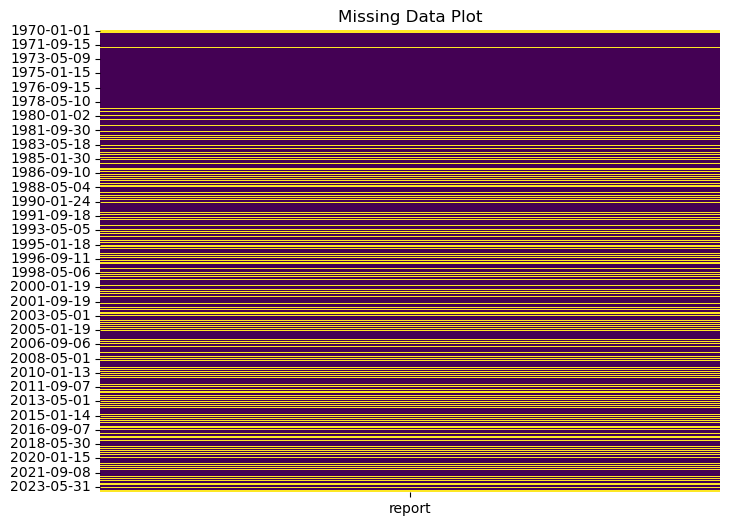

In [10]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data Plot')
plt.show()

Not all of the months I attemped to access actually have Beige Book reports. I think this is partially due to some reports not being available, and partially because the Federal Reserve only releases eight Beige Book reports annually, so not every month and year combination I tried will be a valid URL. I will carry the last observation forward to impute the missing data, i.e. assume that the previous period's report is the most accurate representation of conditions for the missing reporting period.

In [11]:
df['report'].fillna(method = 'ffill', inplace=True)

In [12]:
df.isna().sum()

report    4
dtype: int64

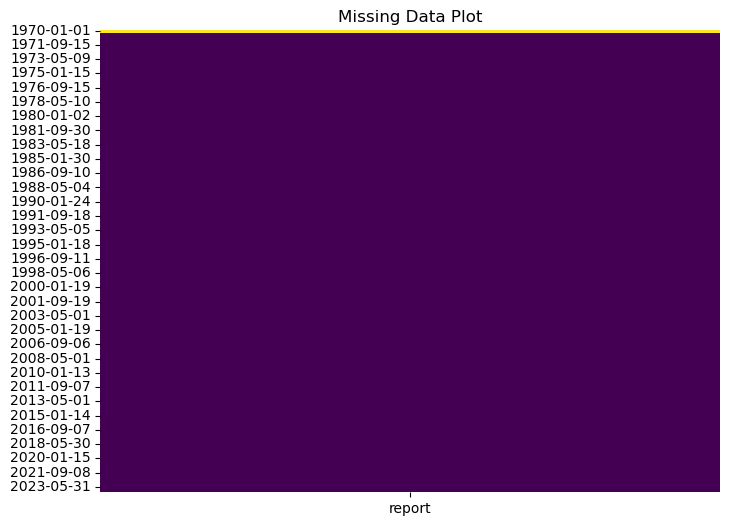

In [13]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data Plot')
plt.show()

In [14]:
df.head()

,report
1970-01-01,NaN
1970-02-01,NaN
1970-03-01,NaN
1970-04-01,NaN
1970-05-20,This initial report of economic conditions in ...


---------

In [15]:
def get_fred():
    test =  fred.get_series_df('GDPPOT')[['date', 'value']]
    return test

In [16]:
get_fred()

,date,value
0,1949-01-01,.
1,1949-04-01,.
2,1949-07-01,.
3,1949-10-01,.
4,1950-01-01,2218.5665855133384
...,...,...
335,2032-10-01,.
336,2033-01-01,.
337,2033-04-01,.
338,2033-07-01,.


In [32]:
def get_fred():
    fred_df = pd.DataFrame()
    for metric in ['GDPPOT', 
                   'GDP', 
                   'FPCPITOTLZGUSA', 
                   'CORESTICKM159SFRBATL', 
                   'UNRATE',
                   'gnpca',
                   'PRS85006092', 
                   'MPU4900083']:
    
        metric_output =  fred.get_series_df(metric)[['date', 'value']]
        metric_output.set_index('date', inplace = True)
        
        metric_output['value'] = [float(v) if v != '.' else np.nan for v in metric_output['value']]
        
        metric_output.index = pd.to_datetime(metric_output.index)
        metric_output = metric_output.rename(columns = {'value': f"{metric}"})
        fred_df = metric_output.join(fred_df, how = 'outer')
    return fred_df

In [31]:
fred_df = get_fred()
fred_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13056\3412650522.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_output['value'] = [float(v) if v != '.' else np.nan for v in metric_output['value']]


AttributeError: 'DatetimeIndex' object has no attribute 'asfreq'

In [19]:
fred_df.loc['2022-10-01']

MPU4900083                       NaN
PRS85006092                 1.600000
gnpca                            NaN
UNRATE                      3.700000
CORESTICKM159SFRBATL        6.364809
FPCPITOTLZGUSA                   NaN
GDP                     26137.992000
GDPPOT                  20334.210000
Name: 2022-10-01 00:00:00, dtype: float64

In [20]:
fred_df[fred_df['GDP'] < 26137.992]['GDP']

date
1947-01-01      243.164
1947-04-01      245.968
1947-07-01      249.585
1947-10-01      259.745
1948-01-01      265.742
                ...    
2021-07-01    23550.420
2021-10-01    24349.121
2022-01-01    24740.480
2022-04-01    25248.476
2022-07-01    25723.941
Name: GDP, Length: 303, dtype: float64

In [21]:
fred_df.dtypes

MPU4900083              float64
PRS85006092             float64
gnpca                   float64
UNRATE                  float64
CORESTICKM159SFRBATL    float64
FPCPITOTLZGUSA          float64
GDP                     float64
GDPPOT                  float64
dtype: object

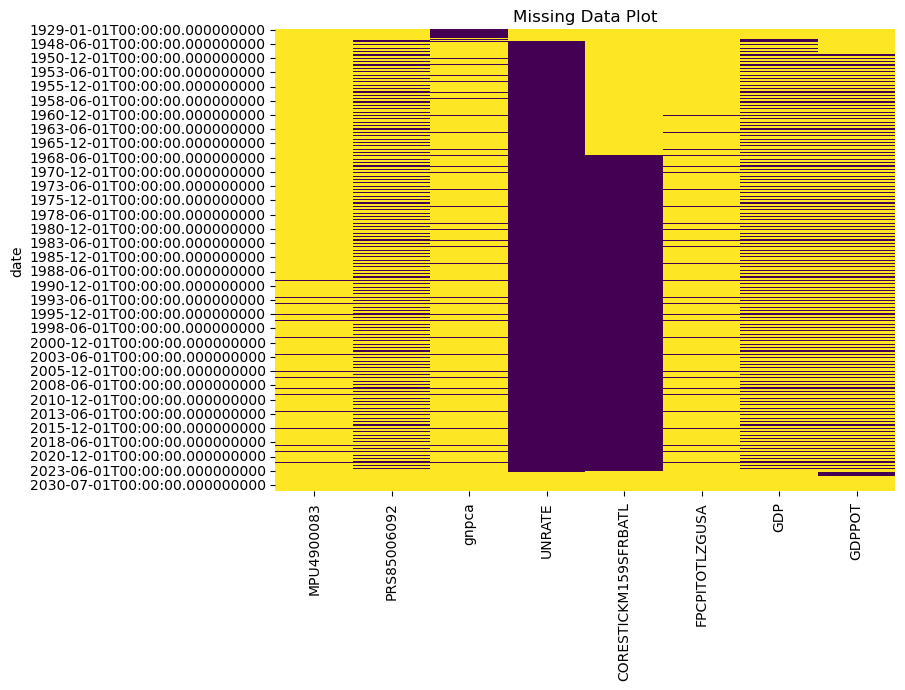

In [22]:
plt.figure(figsize = (8, 6))
sns.heatmap(fred_df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data Plot')
plt.show()

-------


In [29]:
def get_fred2():
    fred_df = pd.DataFrame()
    for metric in ['GDPPOT', 
                   'GDP', 
                   'FPCPITOTLZGUSA', 
                   'CORESTICKM159SFRBATL', 
                   'UNRATE',
                   'gnpca',
                   'PRS85006092', 
                   'MPU4900083']:
    
        metric_output =  fred.get_series_df(metric)[['date', 'value']]
        metric_output.set_index('date', inplace = True)
        
        metric_output['value'] = [float(v) if v != '.' else np.nan for v in metric_output['value']]
        
        metric_output.index = pd.to_datetime(metric_output.index)
        metric_output = metric_output.rename(columns = {'value': f"{metric}"})
        fred_df = metric_output.join(fred_df)
    return fred_df

In [24]:
fred_df_inner = get_fred2()

C:\Users\User\AppData\Local\Temp\ipykernel_13056\4032784566.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_output['value'] = [float(v) if v != '.' else np.nan for v in metric_output['value']]
C:\Users\User\AppData\Local\Temp\ipykernel_13056\4032784566.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_output['value'] = [float(v) if v != '.' else np.nan for v in metric_output['value']]
C:\Users\User\AppData\Local\Temp\ipykernel_13056\4032784566.py:15: SettingWithCopyWarning: 
A value is

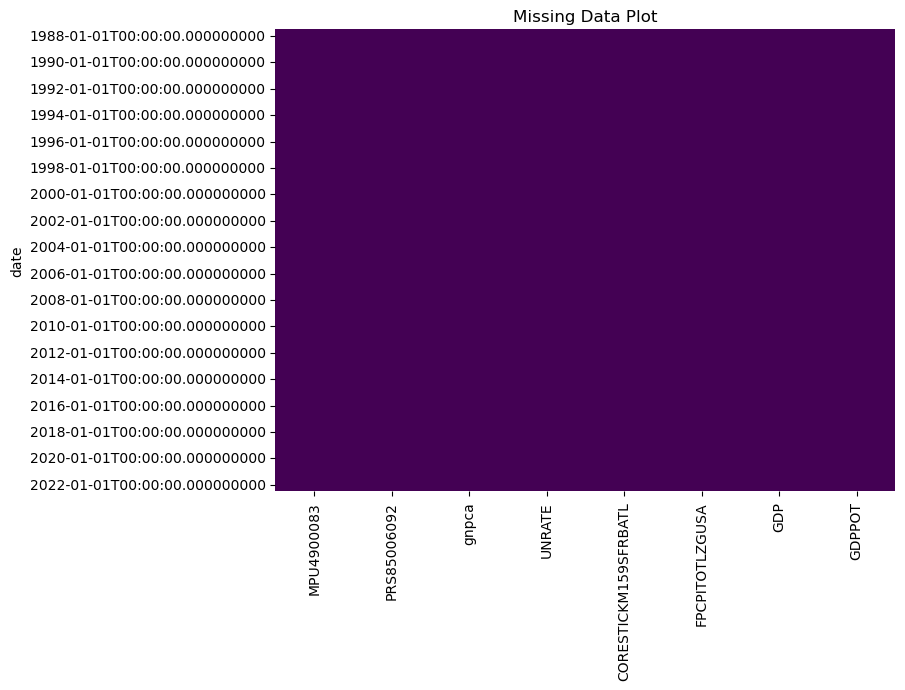

In [25]:
plt.figure(figsize = (8, 6))
sns.heatmap(fred_df_inner.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data Plot')
plt.show()

In [26]:
fred_df_inner.head()

,MPU4900083,PRS85006092,gnpca,UNRATE,CORESTICKM159SFRBATL,FPCPITOTLZGUSA,GDP,GDPPOT
date,,,,,,,,
1988-01-01,1.3,1.4,8916.983,5.7,4.383640,4.077741,5073.372,8785.472576
1989-01-01,1.3,0.2,9244.062,5.4,4.756783,4.827003,5511.253,9052.633535
1990-01-01,3.8,3.8,9430.025,5.4,4.920589,5.397956,5872.701,9346.287613
1991-01-01,5.2,1.2,9411.632,6.4,5.839029,4.234964,6035.178,9590.449791
1992-01-01,2.6,8.2,9739.841,7.3,4.069913,3.028820,6363.102,9821.262797


In [27]:
fred_df

,MPU4900083,PRS85006092,gnpca,UNRATE,CORESTICKM159SFRBATL,FPCPITOTLZGUSA,GDP,GDPPOT
date,,,,,,,,
1929-01-01,NaN,NaN,1120.718,NaN,NaN,NaN,NaN,NaN
1930-01-01,NaN,NaN,1025.678,NaN,NaN,NaN,NaN,NaN
1931-01-01,NaN,NaN,958.927,NaN,NaN,NaN,NaN,NaN
1932-01-01,NaN,NaN,834.769,NaN,NaN,NaN,NaN,NaN
1933-01-01,NaN,NaN,823.628,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2032-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
def get_fred():
    fred_df = pd.DataFrame()
    for metric in ['GDPPOT', 
                   'GDP', 
                   'FPCPITOTLZGUSA', 
                   'CORESTICKM159SFRBATL', 
                   'UNRATE',
                   'gnpca',
                   'PRS85006092', 
                   'MPU4900083']:
    
        metric_output =  fred.get_series_df(metric)[['date', 'value']]
        metric_output.set_index('date', inplace = True)
        metric_output.index = pd.to_datetime(metric_output.index)
        
        metric_output = metric_output.resample('M').asfreq()        
        metric_output['value'] = metric_output['value'].apply(lambda v: float(v) if v != '.' else np.nan)
        metric_output = metric_output.fillna(method='ffill')  # Forward-fill missing values

        metric_output = metric_output.rename(columns = {'value': f"{metric}"})
        fred_df = metric_output.join(fred_df, how = 'outer')
    return fred_df

In [72]:
fred_df2 = get_fred()

In [73]:
fred_df2

,MPU4900083,PRS85006092,gnpca,UNRATE,CORESTICKM159SFRBATL,FPCPITOTLZGUSA,GDP,GDPPOT
date,,,,,,,,
1929-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2033-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2033-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
fred_df2.isna().sum()

MPU4900083              1258
PRS85006092             1258
gnpca                   1258
UNRATE                  1258
CORESTICKM159SFRBATL    1258
FPCPITOTLZGUSA          1258
GDP                     1258
GDPPOT                  1258
dtype: int64

In [118]:
date_index = []
for year in range(1980, 2024):
    for quarterly_month in [1, 4, 7, 10]:
        fred_date = f"{year}-{quarterly_month}-01"
        fred_date = pd.to_datetime(fred_date)
        date_index.append(fred_date.strftime('%Y-%m-%d'))

fred_df = pd.DataFrame(index = date_index)

""
1980-01-01
1980-04-01
1980-07-01
1980-10-01
1981-01-01
...
2022-10-01
2023-01-01
2023-04-01
2023-07-01


In [125]:
fred_df = pd.DataFrame()

In [126]:
def get_fred():
    
    date_index = []
    
    for year in range(1929, 2024):
        for quarterly_month in [1, 4, 7, 10]:
            fred_date = f"{year}-{quarterly_month}-01"
            fred_date = pd.to_datetime(fred_date)
            date_index.append(fred_date.strftime('%Y-%m-%d'))
    fred_df = pd.DataFrame(index = date_index)
            
    for metric in ['GDPPOT', 
                   'GDP', 
                   'FPCPITOTLZGUSA', 
                   'CORESTICKM159SFRBATL', 
                   'UNRATE',
                   'gnpca',
                   'PRS85006092', 
                   'MPU4900083']:
    
        metric_output =  fred.get_series_df(metric)[['date', 'value']]
        metric_output.set_index('date', inplace = True)
        metric_output.index = pd.to_datetime(metric_output.index)
        
        metric_output = metric_output.resample('M').asfreq()        
        metric_output['value'] = metric_output['value'].apply(lambda v: float(v) if v != '.' else np.nan)
        metric_output = metric_output.fillna(method='ffill')  # Forward-fill missing values

        metric_output = metric_output.rename(columns = {'value': f"{metric}"})
        fred_df = metric_output.join(fred_df, how = 'outer')
    return fred_df

In [127]:
meme = get_fred()

In [128]:
meme

,MPU4900083,PRS85006092,gnpca,UNRATE,CORESTICKM159SFRBATL,FPCPITOTLZGUSA,GDP,GDPPOT
1929-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------

In [235]:
date = []
for year in range(1940, 2024):
    for quarterly_month in range(1,13):
        date1 = f"{year}-{quarterly_month}-01"
        date1 = pd.to_datetime(date1)
        date.append(date1.strftime('%Y-%m-%d'))

In [236]:
pd.DataFrame(index = date)

""
1940-01-01
1940-02-01
1940-03-01
1940-04-01
1940-05-01
...
2023-08-01
2023-09-01
2023-10-01
2023-11-01


In [243]:
def get_fred():
    
    date_index = []
    
    for year in range(1940, 2024):
        for quarterly_month in range(1, 13):
            fred_date = f"{year}-{quarterly_month}-01"
            fred_date = pd.to_datetime(fred_date)
            date_index.append(fred_date.strftime('%Y-%m-%d'))
    fred_df = pd.DataFrame(index = date_index)
            
    for metric in ['GDPPOT', 
                   'GDP']: 
#                    'FPCPITOTLZGUSA', 
#                    'CORESTICKM159SFRBATL', 
#                    'UNRATE',
#                    'gnpca',
#                    'PRS85006092', 
#                    'MPU4900083']:
    
        metric_output =  fred.get_series_df(metric)[['date', 'value']]
        metric_output.set_index('date', inplace = True)
        metric_output.index = pd.to_datetime(metric_output.index)
        metric_output.index = metric_output.index.strftime('%Y-%m-%d')
        print(metric_output.head())
        metric_output['value'] = metric_output['value'].apply(lambda v: float(v) if v != '.' else np.nan)
        metric_output = metric_output.asfreq('M')
        metric_output.rename(columns = {'value': f"{metric}"}, inplace = True)
        
        fred_df = metric_output.join(fred_df, how = 'outer')
        df.sort_index(inplace=True)
        
#         metric_output = metric_output.fillna(method='ffill')  # Forward-fill missing values

#         fred_df = metric_output.join(fred_df, how = 'outer')
    return fred_df

In [244]:
meme2 = get_fred()
meme2

                         value
date                          
1949-01-01                   .
1949-04-01                   .
1949-07-01                   .
1949-10-01                   .
1950-01-01  2218.5665855133384


C:\Users\User\AppData\Local\Temp\ipykernel_13056\2551138485.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_output['value'] = metric_output['value'].apply(lambda v: float(v) if v != '.' else np.nan)


              value
date               
1946-01-01        .
1946-04-01        .
1946-07-01        .
1946-10-01        .
1947-01-01  243.164


C:\Users\User\AppData\Local\Temp\ipykernel_13056\2551138485.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_output['value'] = metric_output['value'].apply(lambda v: float(v) if v != '.' else np.nan)


,GDP,GDPPOT
1946-01-31 00:00:00,NaN,NaN
1946-02-28 00:00:00,NaN,NaN
1946-03-31 00:00:00,NaN,NaN
1946-04-30 00:00:00,NaN,NaN
1946-05-31 00:00:00,NaN,NaN
...,...,...
2023-08-01,NaN,NaN
2023-09-01,NaN,NaN
2023-10-01,NaN,NaN
2023-11-01,NaN,NaN


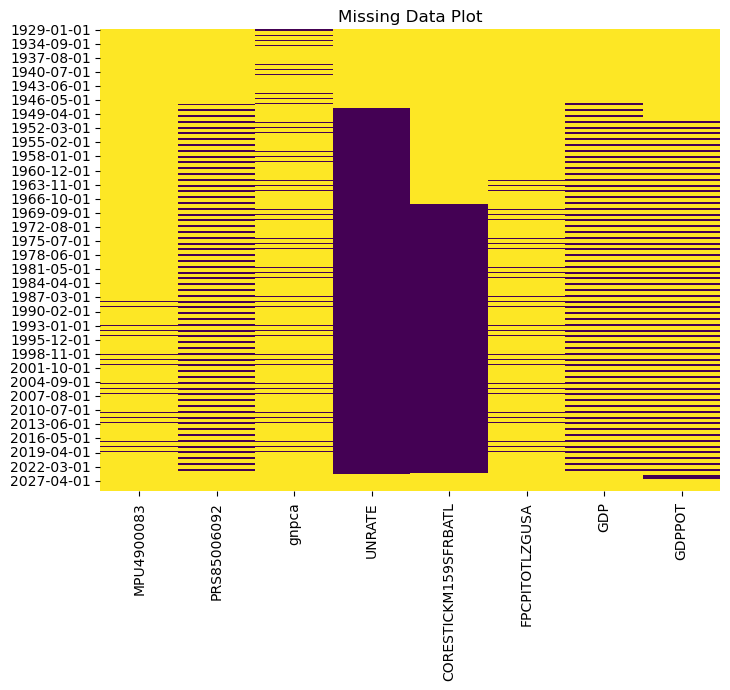

In [204]:
plt.figure(figsize = (8, 6))
sns.heatmap(meme2.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data Plot')
plt.show()

In [232]:
meme2[:1]

,MPU4900083,PRS85006092,gnpca,UNRATE,CORESTICKM159SFRBATL,FPCPITOTLZGUSA,GDP,GDPPOT
1929-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
import pandas as pd
import numpy as np

def get_fred():
    date_index = []
    
    for year in range(1929, 2024):
        for month in range(1, 13):
            fred_date = f"{year}-{month}-01"
            fred_date = pd.to_datetime(fred_date)
            date_index.append(fred_date.strftime('%Y-%m-%d'))
    fred_df = pd.DataFrame(index=date_index)
            
    for metric in ['GDPPOT', 
                   'GDP', 
                   'FPCPITOTLZGUSA', 
                   'CORESTICKM159SFRBATL', 
                   'UNRATE',
                   'gnpca',
                   'PRS85006092', 
                   'MPU4900083']: 

        metric_output =  fred.get_series_df(metric)[['date', 'value']]
        metric_output.set_index('date', inplace=True)
        metric_output.index = pd.to_datetime(metric_output.index)
        metric_output.index = metric_output.index.strftime('%Y-%m-%d')
        metric_output['value'] = metric_output['value'].apply(lambda v: float(v) if v != '.' else np.nan)
        metric_output.rename(columns={'value': f"{metric}"}, inplace=True)
        
        fred_df = metric_output.join(fred_df, how='outer')

    fred_df.sort_index(inplace=True)
        
    return fred_df


In [280]:
meme3 = get_fred()
meme3.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13056\2886900515.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_output['value'] = metric_output['value'].apply(lambda v: float(v) if v != '.' else np.nan)
C:\Users\User\AppData\Local\Temp\ipykernel_13056\2886900515.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metric_output.rename(columns={'value': f"{metric}"}, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13056\2886900515.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,MPU4900083,PRS85006092,gnpca,UNRATE,CORESTICKM159SFRBATL,FPCPITOTLZGUSA,GDP,GDPPOT
1929-01-01,NaN,NaN,1120.718,NaN,NaN,NaN,NaN,NaN
1929-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


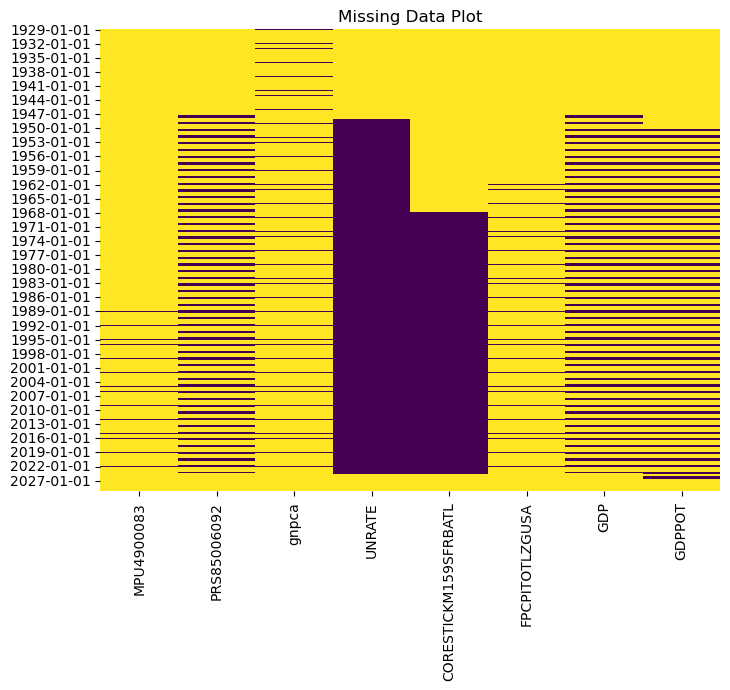

In [281]:
plt.figure(figsize = (8, 6))
sns.heatmap(meme3.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data Plot')
plt.show()